In [6]:
%reload_ext autoreload
%autoreload 2

In [20]:
!mkdir -p plots

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from cMSSA.ssa import CMSSA
from cMSSA.data import get_dummy_data
from cMSSA.vis import multi_channel_plot, plot_rcs

In [8]:
sns.set_context('paper')
plt.rcParams['figure.figsize'] = (20,3)

In [9]:
# hyperparams
window = 100
alpha = 2.0
num_comp = 2

# signal generation
noise = 1.0
num_signals = 500
seed = 42

In [10]:
Y = get_dummy_data(measurement_noise=noise,
                   num_signals=num_signals,
                   seed=seed)
X, sub = get_dummy_data(measurement_noise=noise,
                        num_signals=num_signals,
                        seed=seed+1, # note: we use a different seed
                        # sub-signal
                        add_sub=True,
                        return_sub=True,
                        sub_yscale=1.0,
                        sub_xscale=10.0)

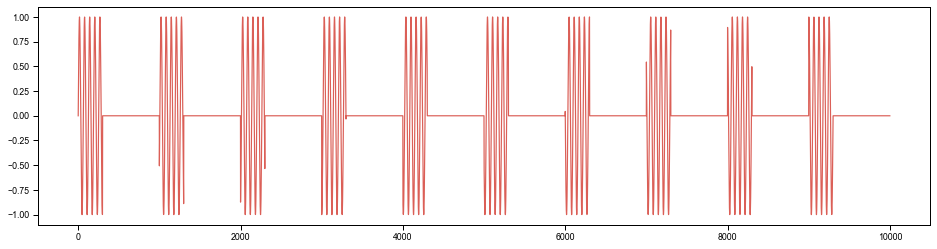

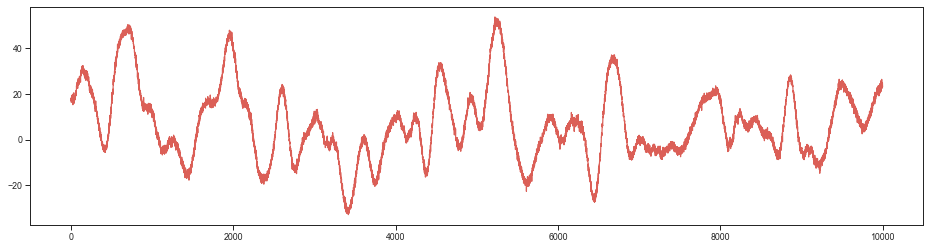

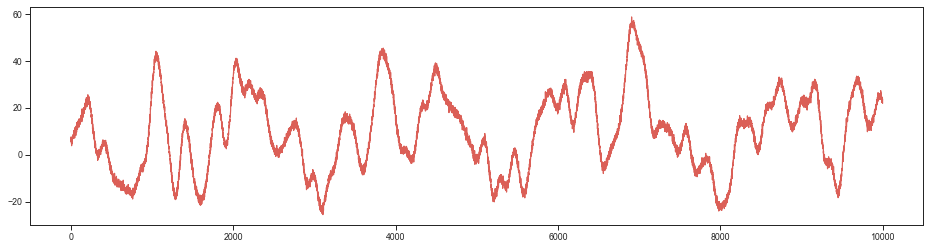

In [11]:
multi_channel_plot(sub, tight=False, save_to='plots/syn_sub.png')
multi_channel_plot(X, tight=False, save_to='plots/syn_x.png')
multi_channel_plot(Y, tight=False, save_to='plots/syn_y.png')

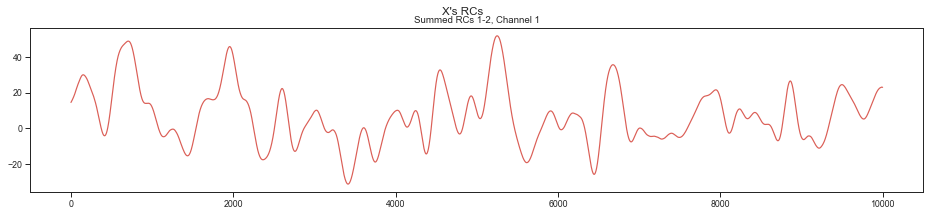

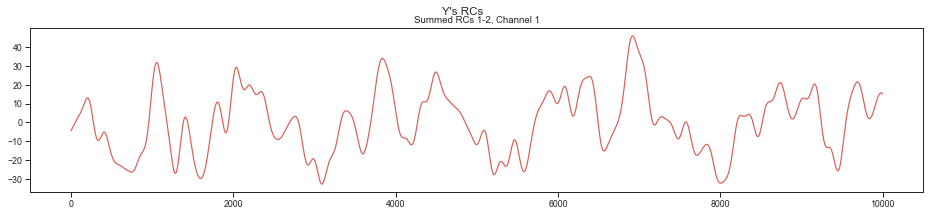

In [18]:
sns.set_context("paper")

cmssa = CMSSA(window=window, alpha=0.0, num_comp=num_comp)

RX = cmssa.fit_transform(X, X, collapse=False)
plot_rcs(RX, tight=False, hide_rcs=True,
         title='X\'s RCs',
         save_to='plots/syn_x_rcs.png')

RY = cmssa.fit_transform(Y, Y, collapse=False)
plot_rcs(RY, tight=False, hide_rcs=True,
         title='Y\'s RCs',
         save_to='plots/syn_y_rcs.png')

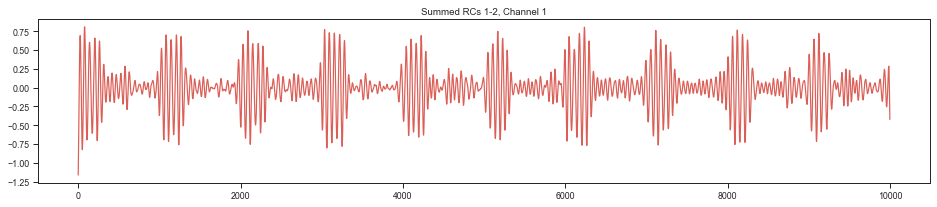

In [14]:
cmssa = CMSSA(window=window, alpha=alpha, num_comp=num_comp)
R_contrast = cmssa.fit_transform(X, Y, collapse=False)
plot_rcs(R_contrast, tight=False, hide_rcs=True, save_to='plots/syn_x_rcs_contrast.png')